# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [128]:
# Here we go... calling dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# To check we read the keys correctly
# print(weather_api_key)
# print(geoapify_key)

### Generate the Cities List by Using the `citipy` Library

In [131]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low = -90,  high = 90,  size=1000)
lngs = np.random.uniform(low = -180, high = 180, size=1000)
lat_lngs = zip(lats, lngs)

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [132]:
# Create list to hold the cities.
cities = []

# Identify nearest city for each lat, lng combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 455


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [133]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=metric&APPID=" + weather_api_key

In [134]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
# record_count = 1
# set_count = 1

# Loop through all the cities in our list to fetch weather data
for city in cities:
        
    # Create endpoint URL with each city. We must replace spaces in city names with "+" to find the data
    city_url = url + "&q=" + city.replace(" ", "+")
        
    # Parse the JSON and retrieve data
    city_weather = requests.get(city_url).json()
    
    # Run an API request for each of the cities
    try:
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, and country
        print(f"{city} found! Appending data")
        city_lat      = city_weather["coord"]["lat"]
        city_lng      = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds   = city_weather["clouds"]["all"]
        city_wind     = city_weather["wind"]["speed"]
        city_country  = city_weather["sys"]["country"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country
                         })

    except:
        # Couldn't find the city
        print(f"{city} not found")
        pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
hermanus found! Appending data
vaini found! Appending data
wad madani found! Appending data
georgetown found! Appending data
rocha found! Appending data
nalut found! Appending data
tiruchchendur found! Appending data
tasiilaq found! Appending data
albany found! Appending data
east london found! Appending data
ancud found! Appending data
san rafael found! Appending data
ushuaia found! Appending data
clyde river found! Appending data
port alfred found! Appending data
mataura found! Appending data
mahebourg found! Appending data
williams lake found! Appending data
taolanaro found! Appending data
taolanaro not found
palabuhanratu found! Appending data
palabuhanratu not found
tsihombe found! Appending data
tsihombe not found
faanui found! Appending data
chokurdakh found! Appending data
moron found! Appending data
belushya guba found! Appending data
belushya guba not found
myanaung found! Appending data
touros found! Appending data


goundam found! Appending data
lolua found! Appending data
lolua not found
ribeirao bonito found! Appending data
likasi found! Appending data
vila found! Appending data
hasaki found! Appending data
malakal found! Appending data
kourou found! Appending data
tigil found! Appending data
amderma found! Appending data
amderma not found
yulara found! Appending data
leshukonskoye found! Appending data
alice springs found! Appending data
galle found! Appending data
sinnamary found! Appending data
karratha found! Appending data
phatthalung found! Appending data
mana found! Appending data
buriti alegre found! Appending data
gandevi found! Appending data
valera found! Appending data
jardim found! Appending data
berezovka found! Appending data
katsuura found! Appending data
malanje found! Appending data
vardo found! Appending data
sahrak found! Appending data
sahrak not found
codrington found! Appending data
tamandare found! Appending data
carnarvon found! Appending data
tiarei found! Appending dat

In [136]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          419
Lat           419
Lng           419
Max Temp      419
Humidity      419
Cloudiness    419
Wind Speed    419
Country       419
dtype: int64

In [137]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,hermanus,-34.4187,19.2345,21.00,84,91,4.41,ZA
1,vaini,-21.2000,-175.2000,26.09,83,75,1.03,TO
2,wad madani,14.4012,33.5199,25.25,21,20,5.13,SD
3,georgetown,5.4112,100.3354,24.97,99,20,0.00,MY
4,rocha,-34.4833,-54.3333,22.26,65,0,3.76,UY


In [138]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [139]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
0,hermanus,-34.4187,19.2345,21.00,84,91,4.41,ZA
1,vaini,-21.2000,-175.2000,26.09,83,75,1.03,TO
2,wad madani,14.4012,33.5199,25.25,21,20,5.13,SD
3,georgetown,5.4112,100.3354,24.97,99,20,0.00,MY
4,rocha,-34.4833,-54.3333,22.26,65,0,3.76,UY


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

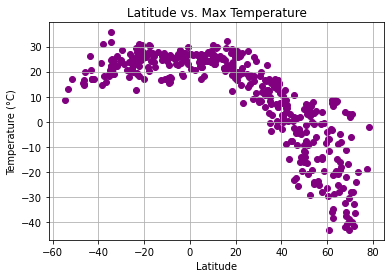

In [140]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o", color = "purple")

# Incorporate the other graph properties
plt.title(f'Latitude vs. Max Temperature')
plt.ylabel("Temperature (°C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Latitude vs. Max Temperature.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

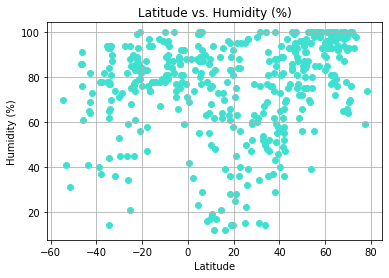

In [141]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o", color = "turquoise")

# Incorporate the other graph properties
plt.title(f'Latitude vs. Humidity (%)')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Latitude vs. Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

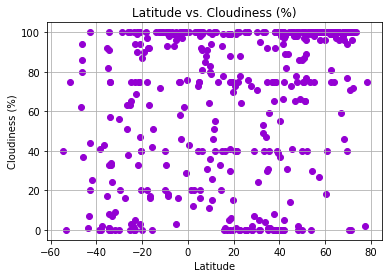

In [142]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o", color = "darkviolet")

# Incorporate the other graph properties
plt.title(f'Latitude vs. Cloudiness (%)')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Latitude vs. Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

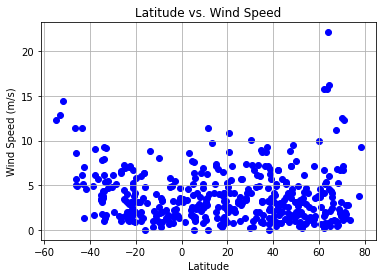

In [143]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o", color = "blue")

# Incorporate the other graph properties
plt.title(f'Latitude vs. Wind Speed')
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Latitude vs. Wind Speed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [144]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
2,wad madani,14.4012,33.5199,25.25,21,20,5.13,SD
3,georgetown,5.4112,100.3354,24.97,99,20,0.00,MY
5,nalut,30.3333,10.8500,8.87,60,71,4.14,LY
6,tiruchchendur,8.4833,78.1167,24.29,78,91,6.38,IN
7,tasiilaq,65.6145,-37.6368,-4.91,92,100,3.72,GL


In [145]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
0,hermanus,-34.4187,19.2345,21.00,84,91,4.41,ZA
1,vaini,-21.2000,-175.2000,26.09,83,75,1.03,TO
4,rocha,-34.4833,-54.3333,22.26,65,0,3.76,UY
9,east london,-33.0153,27.9116,24.09,87,24,1.72,ZA
10,ancud,-41.8697,-73.8203,17.05,73,25,4.62,CL


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8529017980659062


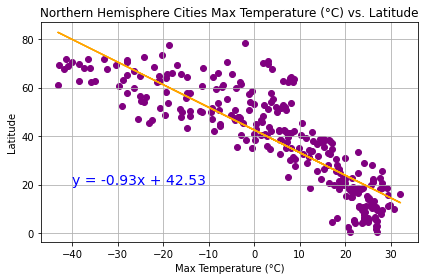

In [146]:
# Linear regression on Northern Hemisphere
# Use linregress() from SciPy to get line of regression to plot onto the chart
(slope1, yint1, rval1, pval1, sterr1) = linregress(
    northern_hemi_df["Max Temp"], northern_hemi_df["Lat"]
)

# Find y-values of regression line 
regress_val1 = (northern_hemi_df["Max Temp"] * slope1) + yint1

# Equation of regression line for annotation
line_eq1 = f"y = {round(slope1, 2)}x + {round(yint1, 2)}"

# Display r-value
print(f"The r-value is: {rval1}")

# Configure scatter plot
plt.scatter(
    northern_hemi_df["Max Temp"], 
    northern_hemi_df["Lat"], 
    color = "purple",
)

# Add labels and title
plt.xlabel("Max Temperature (°C)")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere Cities Max Temperature (°C) vs. Latitude")

# Plot regression line
plt.plot(northern_hemi_df["Max Temp"], regress_val1, color="orange")

# Annotate with regression line
plt.annotate(line_eq1, (-40, 20), fontsize=14, color="blue")

# Grid, tight layout, savefig, and show
plt.grid()
plt.tight_layout()
plt.savefig("../output_data/north_temp.png")
plt.show()

The r-value is: 0.4118524949122872


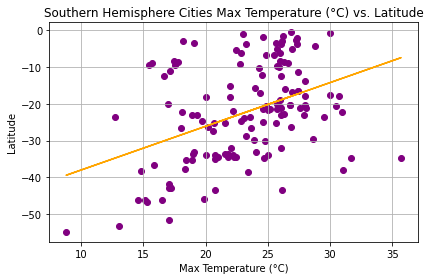

In [147]:
# Linear regression on Southern Hemisphere
# Use linregress() from SciPy to get line of regression to plot onto the chart
(slope1, yint1, rval1, pval1, sterr1) = linregress(
    southern_hemi_df["Max Temp"], southern_hemi_df["Lat"]
)

# Find y-values of regression line 
regress_val1 = (southern_hemi_df["Max Temp"] * slope1) + yint1

# Equation of regression line for annotation
line_eq1 = f"y = {round(slope1, 2)}x + {round(yint1, 2)}"

# Display r-value
print(f"The r-value is: {rval1}")

# Configure scatter plot
plt.scatter(
    southern_hemi_df["Max Temp"], 
    southern_hemi_df["Lat"], 
    color = "purple",
)

# Add labels and title
plt.xlabel("Max Temperature (°C)")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere Cities Max Temperature (°C) vs. Latitude")

# Plot regression line
plt.plot(southern_hemi_df["Max Temp"], regress_val1, color="orange")

# Annotate with regression line
plt.annotate(line_eq1, (-52, 28), fontsize=14, color="blue")

# Grid, tight layout, savefig, and show
plt.grid()
plt.tight_layout()
plt.savefig("../output_data/south_temp.png")
plt.show()

**Discussion about the linear relationship:** 

***Northern Cities vs. Max Temp*** has an r-value of -0.85 which means their latitude and max temperatures are **strongly and negatively correlated**; as their latitude increases, their max temperature decreases. 

***Southern Cities vs. Max Temp*** has an r-value of 0.41 which means there is a **weak positive correlation** between their latitude and max temperatures; as their latitude increases, their max temperature also increases. 
                                                                                    
Cities closer to the equator have warmer temperatures on both hemispheres.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.39502191193039954


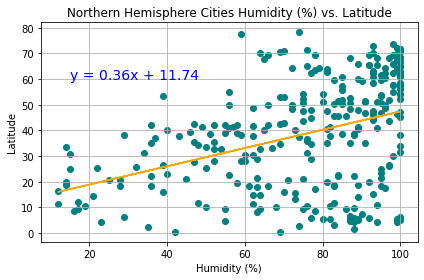

In [148]:
# Northern Hemisphere
# Use linregress() from SciPy to get line of regression to plot onto the chart
(slope1, yint1, rval1, pval1, sterr1) = linregress(
    northern_hemi_df["Humidity"], northern_hemi_df["Lat"]
)

# Find y-values of regression line 
regress_val1 = (northern_hemi_df["Humidity"] * slope1) + yint1

# Equation of regression line for annotation
line_eq1 = f"y = {round(slope1, 2)}x + {round(yint1, 2)}"

# Display r-value
print(f"The r-value is: {rval1}")

# Configure scatter plot
plt.scatter(
    northern_hemi_df["Humidity"], 
    northern_hemi_df["Lat"], 
    color = "Teal",
)

# Add labels and title
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere Cities Humidity (%) vs. Latitude")

# Plot regression line
plt.plot(northern_hemi_df["Humidity"], regress_val1, color="orange")

# Annotate with regression line
plt.annotate(line_eq1, (15, 60), fontsize=14, color="blue")

# Grid, tight layout, savefig, and show
plt.grid()
plt.tight_layout()
plt.savefig("../output_data/north_hum.png")
plt.show()

The r-value is: 0.34817111053773436


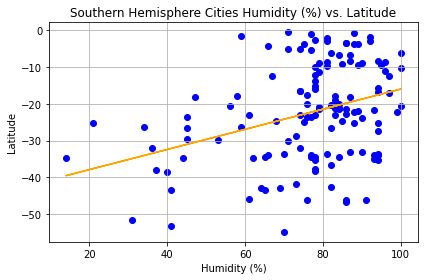

In [149]:
# Southern Hemisphere
# Use linregress() from SciPy to get line of regression to plot onto the chart
(slope1, yint1, rval1, pval1, sterr1) = linregress(
    southern_hemi_df["Humidity"], southern_hemi_df["Lat"]
)

# Find y-values of regression line 
regress_val1 = (southern_hemi_df["Humidity"] * slope1) + yint1

# Equation of regression line for annotation
line_eq1 = f"y = {round(slope1, 2)}x + {round(yint1, 2)}"

# Display r-value
print(f"The r-value is: {rval1}")

# Configure scatter plot
plt.scatter(
    southern_hemi_df["Humidity"], 
    southern_hemi_df["Lat"], 
    color = "blue",
)

# Add labels and title
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere Cities Humidity (%) vs. Latitude")

# Plot regression line
plt.plot(southern_hemi_df["Humidity"], regress_val1, color="orange")

# Annotate with regression line
plt.annotate(line_eq1, (-20, 20), fontsize=14, color="red")

# Grid, tight layout, savefig, and show
plt.grid()
plt.tight_layout()
plt.savefig("../output_data/south_hum.png")

plt.show()

**Discussion about the linear relationship:** 

***Northern Hemisphere Cities Humidity (%) vs. Latitude***
With an r-value of 0.40, the correlation between their humidity and latitude is weak and positive.
The higher the % of humidity, the higher the latitude is.

***Southern Hemisphere Cities Humidity (%) vs. Latitude***
With an r-value of 0.35, we show a weak, positive correlation between the humidity and their latitude.
The higher the % of humidity, the higer the latitude is.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2718747134937842


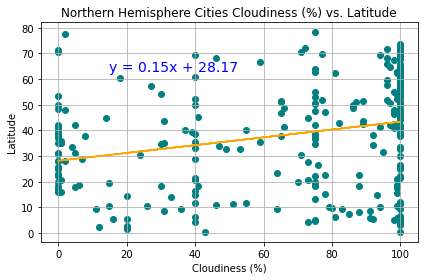

In [150]:
# Northern Hemisphere
# Use linregress() from SciPy to get line of regression to plot onto the chart
(slope1, yint1, rval1, pval1, sterr1) = linregress(
    northern_hemi_df["Cloudiness"], northern_hemi_df["Lat"]
)

# Find y-values of regression line 
regress_val1 = (northern_hemi_df["Cloudiness"] * slope1) + yint1

# Equation of regression line for annotation
line_eq1 = f"y = {round(slope1, 2)}x + {round(yint1, 2)}"

# Display r-value
print(f"The r-value is: {rval1}")

# Configure scatter plot
plt.scatter(
    northern_hemi_df["Cloudiness"], 
    northern_hemi_df["Lat"], 
    color = "Teal",
)

# Add labels and title
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere Cities Cloudiness (%) vs. Latitude")

# Plot regression line
plt.plot(northern_hemi_df["Cloudiness"], regress_val1, color="orange")

# Annotate with regression line
plt.annotate(line_eq1, (15, 63), fontsize=14, color="blue")

# Grid, tight layout, savefig, and show
plt.grid()
plt.tight_layout()
plt.savefig("../output_data/north_cloud.png")
plt.show()

The r-value is: 0.3633235964408658


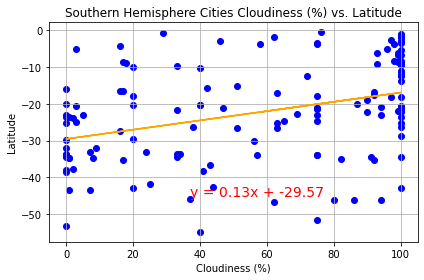

In [151]:
# Southern Hemisphere
# Use linregress() from SciPy to get line of regression to plot onto the chart
(slope1, yint1, rval1, pval1, sterr1) = linregress(
    southern_hemi_df["Cloudiness"], southern_hemi_df["Lat"]
)

# Find y-values of regression line 
regress_val1 = (southern_hemi_df["Cloudiness"] * slope1) + yint1

# Equation of regression line for annotation
line_eq1 = f"y = {round(slope1, 2)}x + {round(yint1, 2)}"

# Display r-value
print(f"The r-value is: {rval1}")

# Configure scatter plot
plt.scatter(
    southern_hemi_df["Cloudiness"], 
    southern_hemi_df["Lat"], 
    color = "blue",
)

# Add labels and title
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere Cities Cloudiness (%) vs. Latitude")

# Plot regression line
plt.plot(southern_hemi_df["Cloudiness"], regress_val1, color="orange")

# Annotate with regression line
plt.annotate(line_eq1, (37, -45), fontsize=14, color="red")

# Grid, tight layout, savefig, and show
plt.grid()
plt.tight_layout()
plt.savefig("../output_data/south_cloud.png")

plt.show()

**Discussion about the linear relationship:**

Northern cities with an r-value of 0.23, the correlation between their cloudiness and latitude is weak and positive.
Similar to the Southern cities with an r-value of 0.36, we show a weak, positive correlation between the cloudiness and their latitude. I believe there is a very small correlation between the citie's cloudiness and altitude. 


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05060421501340808


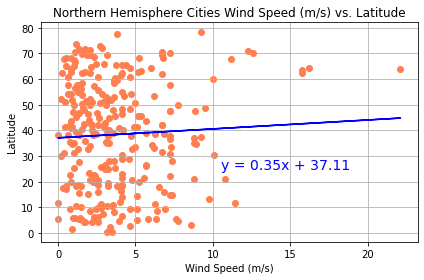

In [152]:
# Northern Hemisphere
# Use linregress() from SciPy to get line of regression to plot onto the chart
(slope1, yint1, rval1, pval1, sterr1) = linregress(
    northern_hemi_df["Wind Speed"], northern_hemi_df["Lat"]
)

# Find y-values of regression line 
regress_val1 = (northern_hemi_df["Wind Speed"] * slope1) + yint1

# Equation of regression line for annotation
line_eq1 = f"y = {round(slope1, 2)}x + {round(yint1, 2)}"

# Display r-value
print(f"The r-value is: {rval1}")

# Configure scatter plot
plt.scatter(
    northern_hemi_df["Wind Speed"], 
    northern_hemi_df["Lat"], 
    color = "coral",
)

# Add labels and title
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere Cities Wind Speed (m/s) vs. Latitude")

# Plot regression line
plt.plot(northern_hemi_df["Wind Speed"], regress_val1, color="blue")

# Annotate with regression line
plt.annotate(line_eq1, (10.5, 25), fontsize=14, color="blue")

# Grid, tight layout, savefig, and show
plt.grid()
plt.tight_layout()
plt.savefig("../output_data/north_wind.png")
plt.show()

The r-value is: -0.5372647447811787


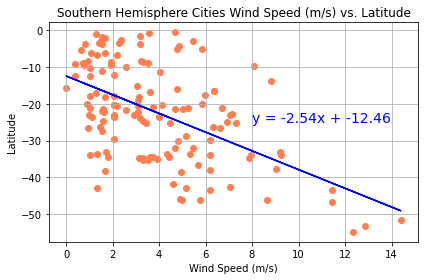

In [154]:
# Southern Hemisphere
# Use linregress() from SciPy to get line of regression to plot onto the chart
(slope1, yint1, rval1, pval1, sterr1) = linregress(
    southern_hemi_df["Wind Speed"], southern_hemi_df["Lat"]
)

# Find y-values of regression line 
regress_val1 = (southern_hemi_df["Wind Speed"] * slope1) + yint1

# Equation of regression line for annotation
line_eq1 = f"y = {round(slope1, 2)}x + {round(yint1, 2)}"

# Display r-value
print(f"The r-value is: {rval1}")

# Configure scatter plot
plt.scatter(
    southern_hemi_df["Wind Speed"], 
    southern_hemi_df["Lat"], 
    color = "coral",
)

# Add labels and title
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere Cities Wind Speed (m/s) vs. Latitude")

# Plot regression line
plt.plot(southern_hemi_df["Wind Speed"], regress_val1, color="blue")

# Annotate with regression line
plt.annotate(line_eq1, (8, -25), fontsize=14, color="blue")

# Grid, tight layout, savefig, and show
plt.grid()
plt.tight_layout()
plt.savefig("../output_data/south_wind.png")
plt.show()

**Discussion about the linear relationship:** 

***Northern Hemisphere Cities Wind Speed (%) vs. Latitude*** with an r-value of 0.05, the correlation between their wind speed and latitude is almost null. We cannot predict the wind speed of a city by its latitude and viceversa.

***Southern Hemisphere Cities Wind Speed (%) vs. Latitude*** with an r-value of -0.54, we show a week, negative correlation between the wind speed and their latitude. The closer a city is to the equator, the lower is its wind spped.